# Section 2.2.1: Perceptron
## by Telmo Cunha

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Perceptron (Binary Classification)

#### Data input

In [2]:
# x: each row is a datapoint
x=np.array([[-1,0],[0,0.25],[1,1],[1,-1]])
y=np.array([-1,1,1,-1])

#### Perceptron algorithm

In [3]:
def perceptron(x,y,init="zero",plot="no"):
    
    n_examples=x.shape[0]
    dim=x.shape[1]
    
    eta=1
    
    #initialization
    if(init=="zero"):
        w=np.zeros(dim+1)
    elif(init=="gaussian"):
        w=np.random.normal(0,1,dim+1)
        
    mistakes=0
    epochs=0
    predict=np.zeros((n_examples))

    # addings the bias term entries
    x=np.insert(x,0,1,axis=1)
    
    while(np.linalg.norm(predict-y)!=0):
        
        epochs+=1
        
        for n in range(n_examples):
 
            predict[n]=np.sign(np.dot(w,x[n,:]))
            
            # we want >=0 to have + sign and np.sign assigns 0 when input is 0
            if(predict[n]==0):
                predict[n]=1
            
            if(predict[n]!=y[n]):
                w=w+eta*y[n]*x[n,:]
                mistakes+=1
        
        print("Epoch:",epochs)
        print("w:",w)
        
        if(plot=="yes"):
            plot_plane(w)
                
    print("It took",mistakes,"mistakes and",epochs,"epochs to converge.")
    return w

In [4]:
def plot_plane(w):

    n_examples=x.shape[0]
    
    #plot datapoints
    for j in range(n_examples):
        if y[j]==1:
            plt.scatter(x[j][0],x[j][1], c='blue',marker='+')
        else:
            plt.scatter(x[j][0],x[j][1], c= 'green', marker='o')
            
    #plot separating line
    xx = np.linspace(-1.5, 1.5,200)
    yy = -((w[1])/(w[2]))*xx-(w[0])/(w[2])
    
    plt.plot(xx, yy, 'k-')
    plt.show()

Epoch: 1
w: [-1.    0.    1.25]


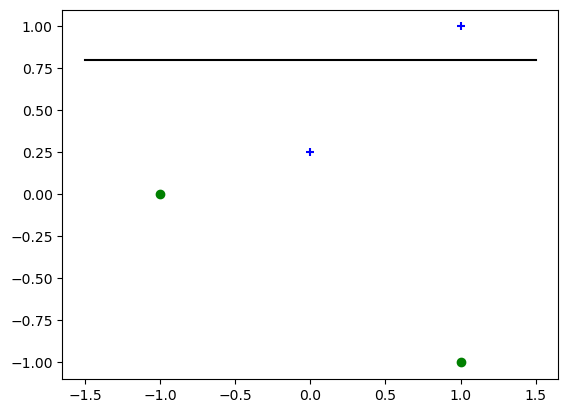

Epoch: 2
w: [0.  0.  1.5]


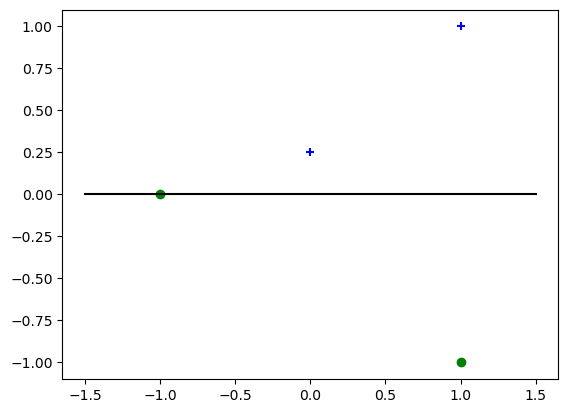

Epoch: 3
w: [0.   1.   1.75]


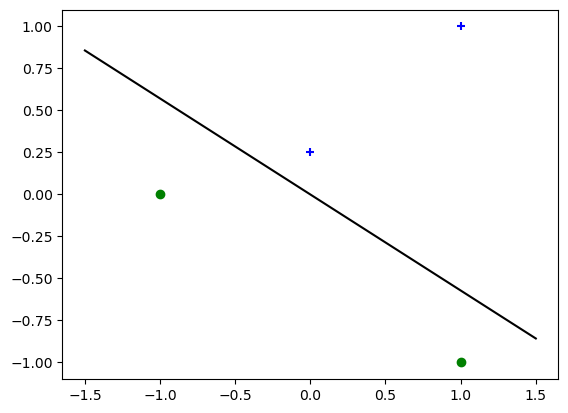

Epoch: 4
w: [0.   1.   1.75]


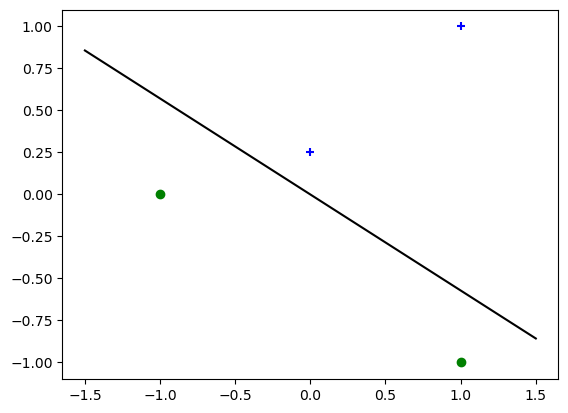

It took 6 mistakes and 4 epochs to converge.


In [5]:
w=perceptron(x,y,plot="yes")

#### Computing the label predicted for input $(x_1,x_2)=(0,1)$

In [6]:
# Computing the label of point (0,1) (with added bias term =1)
print(np.sign(np.dot(w,np.array([1,0,1]))))

1.0


#### Gaussian weight initialization (always converges)

Epoch: 1
w: [-0.82655072 -0.30197214  0.68562456]


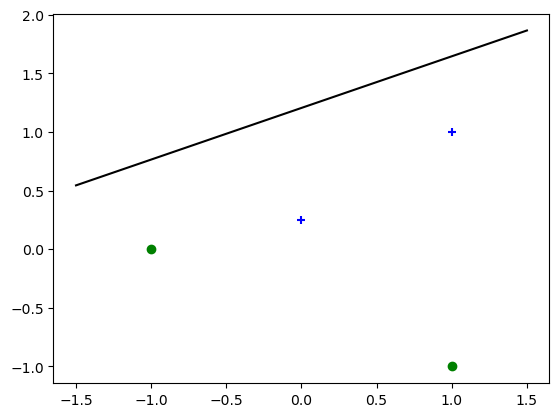

Epoch: 2
w: [ 0.17344928 -0.30197214  0.93562456]


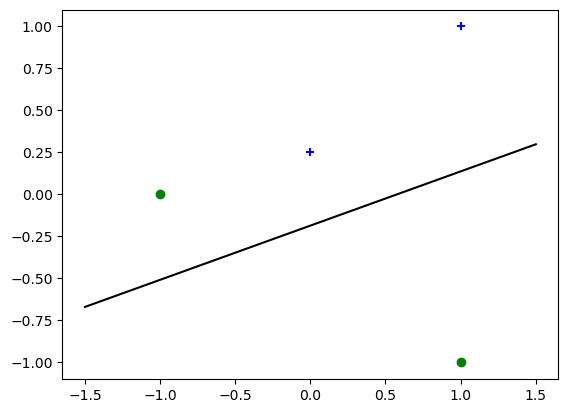

Epoch: 3
w: [0.17344928 0.69802786 1.18562456]


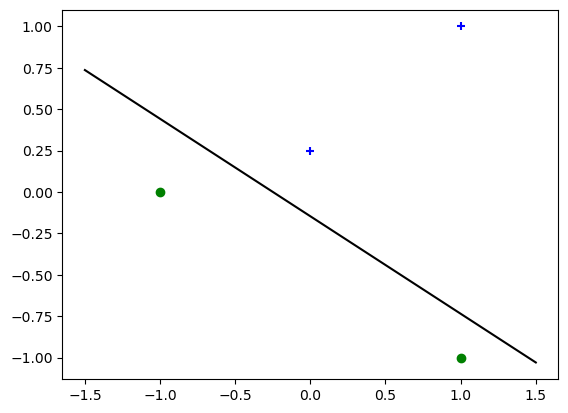

Epoch: 4
w: [0.17344928 0.69802786 1.18562456]


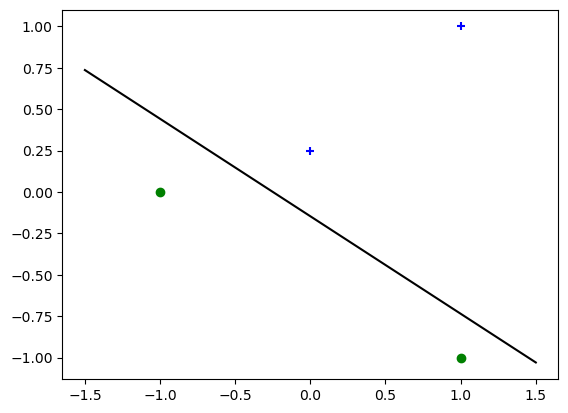

It took 4 mistakes and 4 epochs to converge.


In [7]:
w=perceptron(x,y,"gaussian",plot="yes")

## Perceptron (Multiclass Classification)

In [8]:
def multiclass_perceptron(x_train,y_train,classes=0,init="zero"):
    """
    Multiclass perceptron
    """
    
    n_examples=x_train.shape[0]
    dim=x_train.shape[1]
    
    eta=1
    mistakes=0
    max_epochs=100
    epochs=0
    
    train_acc=[]
    
    if(init=="zero"):
        W=np.zeros((classes,dim+1))
    elif(init=="gaussian"):
        W=np.random.normal(0,1,(classes,dim+1))
        
    predict_train=np.zeros((n_examples,1))
    
    # addings the bias term entries
    x_train=np.insert(x_train,0,1,axis=1)
    
    while (epochs<max_epochs):
        
        for n in range(n_examples):
             
            predict_train[n][0]=np.argmax(np.dot(W,x_train[n,:]))+1
            
            if(predict_train[n][0]!=y_train[n]):
                
                W[int(y_train[n])-1,:]=W[int(y_train[n])-1,:]+eta*x_train[n,:]
                W[int(predict_train[n][0])-1,:]=W[int(predict_train[n][0])-1,:]-eta*x_train[n,:]
                mistakes+=1
                
        train_acc.append(accuracy(predict_train,y_train))
        epochs+=1
     
    return W,train_acc

In [9]:
def generate_data():
    """
    Generates N samples from 3 gaussian distributions
    """
    
    N=30
    classes=3
    balanced_number=int(N/classes)
 
    x=np.zeros((N,2))
    y=np.zeros((N,1))

    for j in range(classes):
        for i in range(balanced_number):
            y[i+10*j]=j+1
            if(j==0):
                x[i+10*j]=np.random.multivariate_normal([0,0],np.eye(2))
            elif(j==1):
                x[i+10*j]=np.random.multivariate_normal([0,3],np.eye(2))
            elif(j==2):
                x[i+10*j]=np.random.multivariate_normal([2,2],np.eye(2))
 
    x=np.insert(x,0,1,axis=1)
    
    # permutate randomly x and y (otherwise we get a good starting predictor by chance)
    p = np.random.permutation(N)
    return x[p], y[p]

In [10]:
def accuracy(predictor,y):
    """
    Computes accuracy
    """
    z=predictor-y
    count=0
    
    for i in range(len(z)):
        if z[i]==0:
            count+=1
    return count/len(z)

In [11]:
x,y=generate_data()

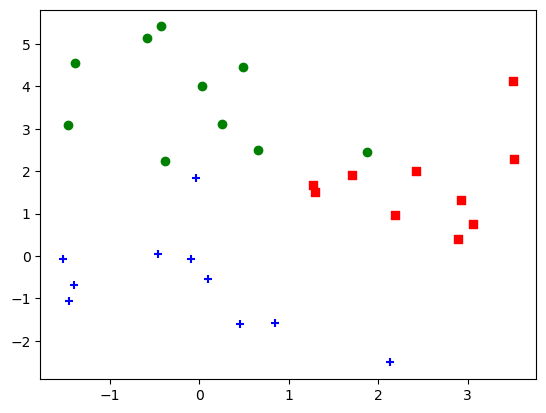

In [12]:
#plot generated data

for j in range(x.shape[0]):
    if y[j]==1:
        plt.scatter(x[j][1],x[j][2], c='blue',marker='+')
    elif y[j]==2:
        plt.scatter(x[j][1],x[j][2], c= 'green', marker='o')
    elif y[j]==3:
        plt.scatter(x[j][1],x[j][2], c= 'red', marker='s')

Accuracy: 0.9333333333333333


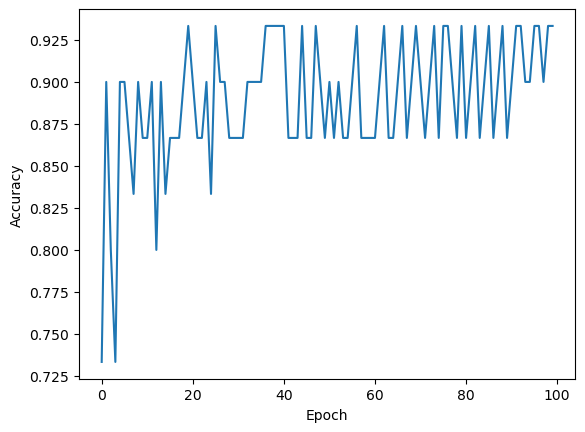

In [13]:
W,acc_train=multiclass_perceptron(x,y,classes=3,init="zero")

print("Accuracy:",acc_train[-1])

# accuracy for each epoch

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(range(100), acc_train)

## Learning Logical functions (NOT, AND, OR)

### NOT

In [14]:
# inputs/outputs cant be set to zero (the update rule ill not work)
x=np.array([[-1],[1]])
y=np.array([1,-1])

In [15]:
# there are no updates
w=perceptron(x,y,init="zero",plot="no")

Epoch: 1
w: [-1. -1.]
Epoch: 2
w: [-1. -1.]
It took 1 mistakes and 2 epochs to converge.


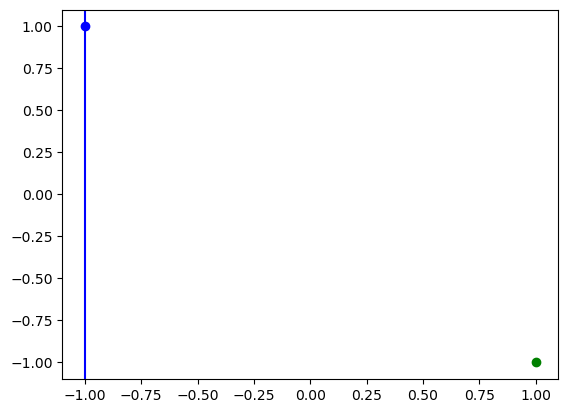

In [16]:
#plot datapoints

plt.scatter(x[0][0],y[0], c='blue',marker='o')
plt.scatter(x[1][0],y[1], c= 'green', marker='o')
        
#plot separating line
plt.axvline(x = w[1], color = 'b', label = 'axvline - full height')

### AND

In [17]:
x=np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
y=np.array([-1,-1,-1,1])

In [18]:
w=perceptron(x,y,init="zero",plot="no")
print(w)

Epoch: 1
w: [-1.  1.  1.]
Epoch: 2
w: [-1.  1.  1.]
It took 1 mistakes and 2 epochs to converge.
[-1.  1.  1.]


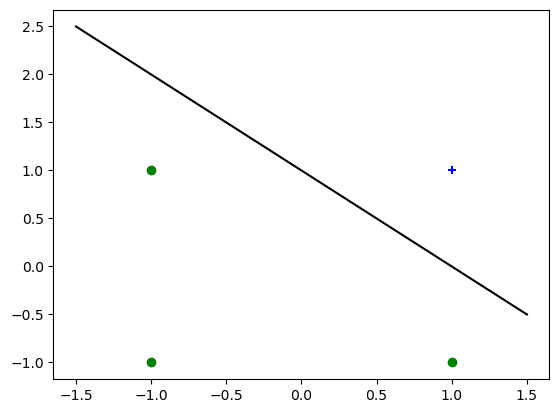

In [19]:
#plot datapoints
for j in range(x.shape[0]):
    if y[j]==1:
        plt.scatter(x[j][0],x[j][1], c='blue',marker='+')
    else:
        plt.scatter(x[j][0],x[j][1], c= 'green', marker='o')
        
#plot separating line
xx = np.linspace(-1.5, 1.5,200)
yy = -((w[1])/(w[2]))*xx-(w[0])/(w[2])

plt.plot(xx, yy, 'k-')

### OR

In [20]:
x=np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
y=np.array([-1,1,1,1])

In [21]:
w=perceptron(x,y)
print(w)

Epoch: 1
w: [1. 1. 1.]
Epoch: 2
w: [1. 1. 1.]
It took 3 mistakes and 2 epochs to converge.
[1. 1. 1.]


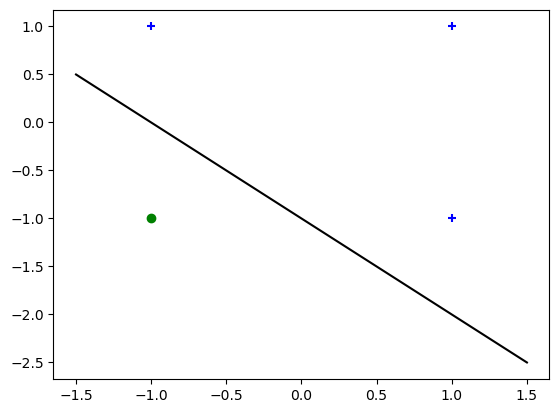

In [22]:
#plot datapoints
for j in range(x.shape[0]):
    if y[j]==1:
        plt.scatter(x[j][0],x[j][1], c='blue',marker='+')
    else:
        plt.scatter(x[j][0],x[j][1], c= 'green', marker='o')
        
#plot separating line
xx = np.linspace(-1.5, 1.5,200)
yy = -((w[1])/(w[2]))*xx-(w[0])/(w[2])

plt.plot(xx, yy, 'k-')

## Learning UCI handwritten digits with multiclass perceptron

In [23]:
from sklearn.datasets import load_digits
data = load_digits()

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<Figure size 640x480 with 0 Axes>

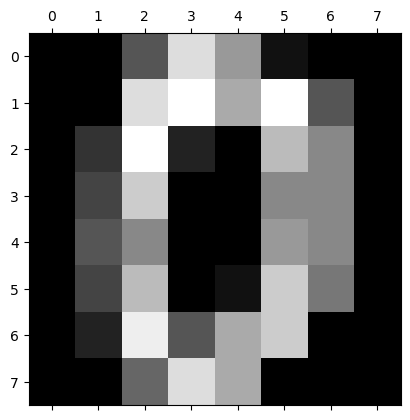

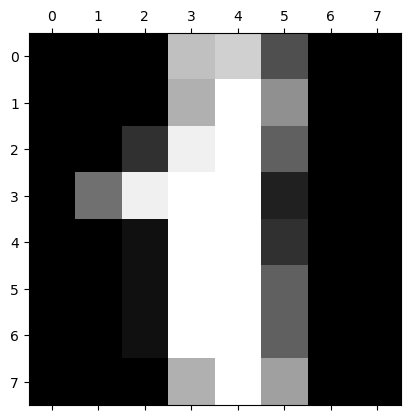

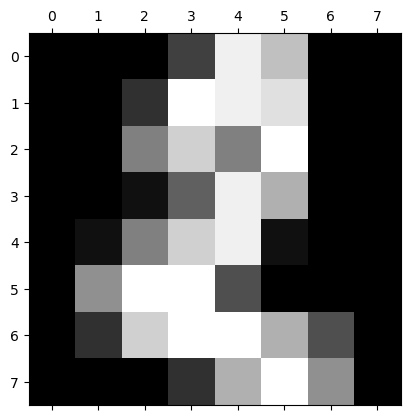

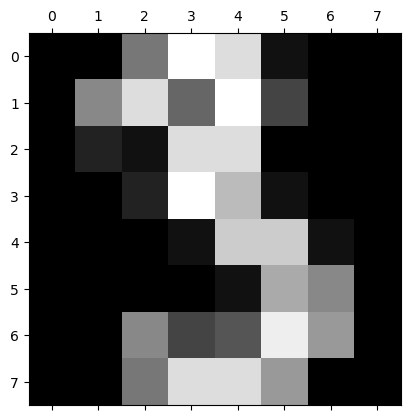

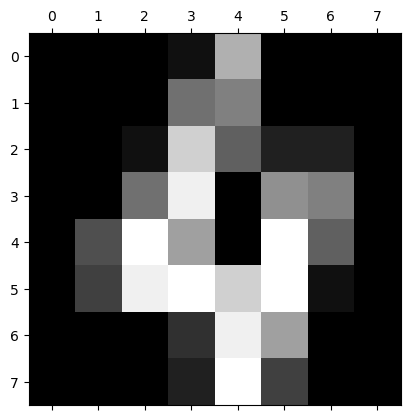

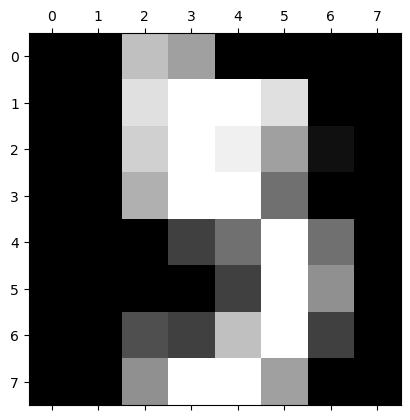

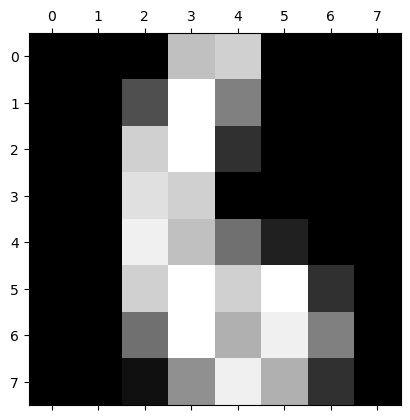

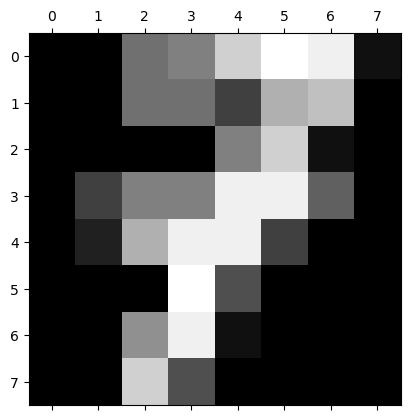

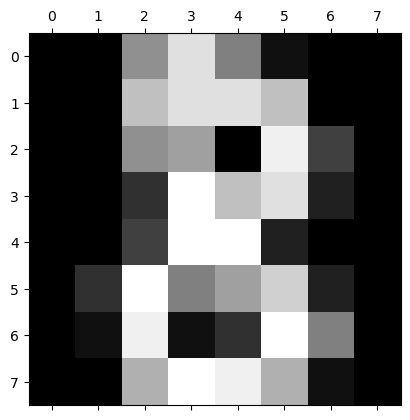

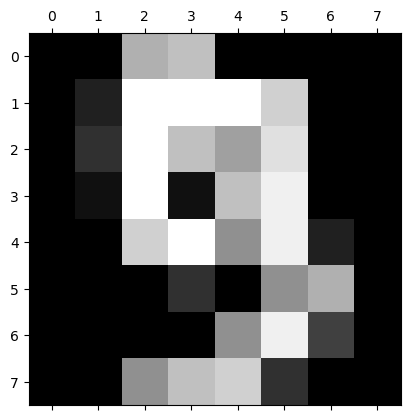

In [24]:
print(data.DESCR)
plt.gray()
for i in range(10):
    plt.matshow(data.images[i])
    plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.images, data.target, test_size=0.2, random_state=42)

In [26]:
# formatting data
x_datatrain=np.zeros((X_train.shape[0],64))
for j in range(X_train.shape[0]):
    x_datatrain[j]=np.ndarray.flatten(X_train[j])

x_datatest=np.zeros((X_test.shape[0],64))
for j in range(X_test.shape[0]):
    x_datatest[j]=np.ndarray.flatten(X_test[j])
    
y_train_mod=y_train.reshape((len(y_train),1))
y_test_mod=y_test.reshape((len(y_test),1))

### Solution using our implementation

In [27]:
def multiclass_perceptron(x_train,y_train,x_test,y_test,classes,init="zero"):
    """
    Multiclass perceptron
    """
    
    n_examples=x_train.shape[0]
    dim=x_train.shape[1]
    
    eta=1
    mistakes=0
    max_epochs=100
    epochs=0
    
    train_acc=[]
    test_acc=[]
    
    if(init=="zero"):
        W=np.zeros((classes,dim+1))
    elif(init=="gaussian"):
        W=np.random.normal(0,1,(classes,dim+1))
        
    predict_train=np.zeros((n_examples,1))
    predict_test=np.zeros((x_test.shape[0],1))
    
    # addings the bias term entries
    x_train=np.insert(x_train,0,1,axis=1)
    x_test=np.insert(x_test,0,1,axis=1)
    
    train_acc.append(accuracy(predict_train,y_train))
    test_acc.append(accuracy(predict_test,y_test))
    
    while (epochs<max_epochs):
        
        for n in range(n_examples):
            
            predict_train[n][0]=np.argmax(np.dot(W,x_train[n,:]))
            
            if(predict_train[n][0]!=y_train[n]):
                
                W[int(y_train[n]),:]+=eta*x_train[n,:]
                W[int(predict_train[n][0]),:]-=eta*x_train[n,:]
                mistakes+=1
        
        for n in range(x_test.shape[0]):
            predict_test[n][0]=np.argmax(np.dot(W,x_test[n,:]))
        
        train_acc.append(accuracy(predict_train,y_train))
        test_acc.append(accuracy(predict_test,y_test))
        epochs+=1
     
    return W,train_acc,test_acc

In [28]:
W,train_acc,test_acc=multiclass_perceptron(x_datatrain,y_train_mod,x_datatest,y_test_mod,classes=10,init="zero")

Train Accuracy: 1.0
Test Accuracy: 0.9527777777777777


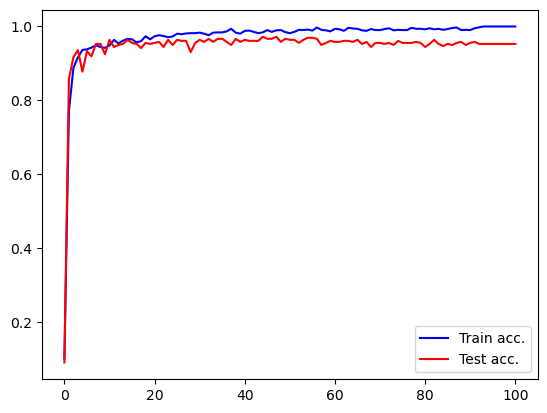

In [29]:
print("Train Accuracy:",train_acc[-1])
print("Test Accuracy:",test_acc[-1])

plt.plot(range(101), train_acc, 'b-', label='Train acc.')
plt.plot(range(101), test_acc, 'r-', label='Test acc.')
plt.legend()
plt.show()

### Solution using perceptron from sklearn

In [30]:
from sklearn.linear_model import Perceptron
clf = Perceptron(fit_intercept=False, shuffle=False)
  
clf.fit(x_datatrain, y_train)
print("Train acc:",clf.score(x_datatrain, y_train))
print("Test acc:",clf.score(x_datatest, y_test))

Train acc: 0.9638135003479471
Test acc: 0.9472222222222222
